# SRI Data Format
The SRI data format saves AMISR data as hdf5 files.  Arrays have attributes that describe their contents and units. This allows for the storage of multibeam data.  

Files have the following top level groups:
- BeamCodes
- Calibration
- FittedParams
- Geomag
- MSIS
- NeFromPower
- ProcessingParams
- Site
- Time

Arrays can be saved at the top level (as `BeamCodes`) or within groups.  Groups can also contain subgroups that contain arrays (such as `FittedParams/FitInfo/`).  Both groups and arrays may have attributes which describe the contents of that item.  For most users, the `TITLE`, `Description`, `Size`, and `Unit` attributs will be most useful to figure out how to use that array appropriately.  In this way, hdf5 files are self descriptive.

## Calibration
This group contains arrays pertaining to the calibration of the data.  Most users should not need to use these arrays.

## FittedParams
This group contains the majority of plasma parameters most scientific user will want to access.
- Altitude
- Errors
- FitInfo
- Fits
- IonMass
- Ne
- Noise
- Range
- dNe

## Geomag
This group contains information about the geolocation of measurments.


## Read in HDF5 File
There are two packages available to read in hdf5 files in python: [h5py](https://docs.h5py.org/en/stable/) and [pytables](https://www.pytables.org/).  These examples will use h5py, but either will work.  The following displays all groups, arrays, and their attributes in an AMISR data file. Most use cases will only require a few of these datasets.  See examples below for some common use cases.

In [41]:
import h5py

filename = '/Users/e30737/Desktop/Data/AMISR/RISR-N/2019/20190510.001_lp_5min-fitcal.h5'

def printattrs(name, obj):
    print(name)
    for key, value in obj.attrs.items():
        try:
            print('\t{}: {}'.format(key, value.decode()))
        except AttributeError:
            print('\t{}: {}'.format(key, value))

with h5py.File(filename) as h5:
    h5.visititems(printattrs)


BeamCodes
	CLASS: CARRAY
	Description: Beamcode array
	FLAVOR: numpy
	Size: Nbeams x 4 (Beamcode, Azimuth (degrees), Elevation (degrees), System constant (m^5/s)
	TITLE: BeamCodes
	VERSION: 1.1
Calibration
	CLASS: GROUP
	FILTERS: 65793
	TITLE: 
	VERSION: 1.0
Calibration/CalDataBeam
	CLASS: CARRAY
	FLAVOR: numpy
	TITLE: Dataset
	VERSION: 1.1
Calibration/CalDate
	CLASS: ARRAY
	FLAVOR: python
	TITLE: Dataset
	VERSION: 2.4
Calibration/CalFileBeam
	CLASS: ARRAY
	FLAVOR: python
	TITLE: Dataset
	VERSION: 2.4
Calibration/CalibrationMethod
	CLASS: ARRAY
	FLAVOR: python
	TITLE: Dataset
	VERSION: 2.4
FittedParams
	CLASS: GROUP
	FILTERS: 65793
	TITLE: 
	VERSION: 1.0
FittedParams/Altitude
	CLASS: CARRAY
	Description: Mean altitude of bin
	FLAVOR: numpy
	TITLE: Altitude
	Unit: Meters
	VERSION: 1.1
FittedParams/Errors
	CLASS: CARRAY
	Description: Errors from fits
	FLAVOR: numpy
	Size: Nrecords x Nbeams x Nranges x Nions+1 x 4 (fraction, temperature, collision frequency, LOS speed)
	TITLE: Errors
	Uni

## Working with Beams

## Time

## Location

## Electron Density

## Temperature and Velocity

(2540, 2) (30,) (2540, 30)


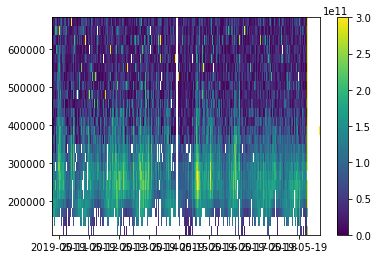

In [18]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = '/Users/e30737/Desktop/Data/AMISR/RISR-N/2019/20190510.001_lp_5min-fitcal.h5'

# Read attributes from hdf5 file
with h5py.File(filename, 'r') as h5:
    # find maximum elevation beam
    bc = h5['BeamCodes'][:]
    bidx = np.argmax(bc[:,2])
    
    # read in data from max elevation beam
    utime = h5['Time/UnixTime'][:]
    alt = h5['FittedParams/Altitude'][bidx,:]
    dens = h5['FittedParams/Ne'][:,bidx,:]

print(utime.shape, alt.shape, dens.shape)
time = np.mean(utime, axis=1).astype('datetime64[s]')

c = plt.pcolormesh(time, alt[np.isfinite(alt)], dens[:,np.isfinite(alt)].T, vmin=0, vmax=3.e11)
plt.colorbar(c)